In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [57]:
!cp /content/gdrive/My\ Drive/Task1/input.csv input.csv

In [58]:
#read in the sample file
input_csv = pd.read_csv("input.csv")

input_csv.head()

,bins_lat,"(6.061, 6.219]","(6.219, 6.367]","(6.367, 6.516]","(6.516, 6.665]","(6.665, 6.813]","(6.813, 6.962]","(6.962, 7.11]","(7.11, 7.259]","(7.259, 7.408]","(7.408, 7.556]","(7.556, 7.705]","(7.705, 7.853]","(7.853, 8.002]","(8.002, 8.151]","(8.151, 8.299]","(8.299, 8.448]","(8.448, 8.596]","(8.596, 8.745]","(8.745, 8.894]","(8.894, 9.042]","(9.042, 9.191]","(9.191, 9.339]","(9.339, 9.488]","(9.488, 9.637]","(9.637, 9.785]","(9.785, 9.934]","(9.934, 10.082]","(10.082, 10.231]","(10.231, 10.38]","(10.38, 10.528]","(10.528, 10.677]","(10.677, 10.825]","(10.825, 10.974]","(10.974, 11.123]","(11.123, 11.271]","(11.271, 11.42]","(11.42, 11.568]","(11.568, 11.717]","(11.717, 11.866]","(11.866, 12.014]","(12.014, 12.163]","(12.163, 12.311]","(12.311, 12.46]","(12.46, 12.609]","(12.609, 12.757]","(12.757, 12.906]","(12.906, 13.054]","(13.054, 13.203]","(13.203, 13.352]","(13.352, 13.5]","(13.5, 13.649]","(13.649, 13.797]","(13.797, 13.946]","(13.946, 14.095]","(14.095, 14.243]","(14.243, 14.392]","(14.392, 14.54]","(14.54, 14.689]","(14.689, 14.838]","(14.838, 14.986]"
0,"(47.511, 47.601]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1104.8,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(47.601, 47.684]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1403.78,0.00,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1183.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1600.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(47.684, 47.766]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5300.0,0.0,0.0,0.00,2134.44,0.0,0.0,0.0,1863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8730.0,1200.0,0.0,8800.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(47.766, 47.849]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,12486.0,4300.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,5220.0,0.0,0.0,8624.0,2014.80,1601.36,0.0,3150.0,0.0,1412.84,0.0,0.0,0.0,0.0,0.0,1206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(47.849, 47.932]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1782.00,0.00,0.0,0.0,0.0,17000.0,0.0,8400.0,0.0,0.0,4675.0,0.0,4800.0,8500.0,0.0,0.0,0.0,6743.31,2790.00,3194.0,0.0,0.0,0.00,0.0,0.0,0.0,1725.0,0.0,1375.0,0.0,5929.4,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Transpose columns to lines
df = input_csv.melt(id_vars="bins_lat")
df.head()

,bins_lat,variable,value
0,"(47.511, 47.601]","(6.061, 6.219]",0.0
1,"(47.601, 47.684]","(6.061, 6.219]",0.0
2,"(47.684, 47.766]","(6.061, 6.219]",0.0
3,"(47.766, 47.849]","(6.061, 6.219]",0.0
4,"(47.849, 47.932]","(6.061, 6.219]",0.0


In [60]:
#rename variables
df = df.rename(columns = {'bins_lat':'lat','variable':'long','value':'weights'})
df.head()

,lat,long,weights
0,"(47.511, 47.601]","(6.061, 6.219]",0.0
1,"(47.601, 47.684]","(6.061, 6.219]",0.0
2,"(47.684, 47.766]","(6.061, 6.219]",0.0
3,"(47.766, 47.849]","(6.061, 6.219]",0.0
4,"(47.849, 47.932]","(6.061, 6.219]",0.0


In [61]:
# df = df.loc[df['weights']!=0]

# create bins
max_weight = df.max()['weights']
#print(max_weight)
bins_list = [0,max_weight/4, max_weight/2, max_weight/4*3, max_weight]
bins_labels = ['Zero-quarter', 'quarter-half', 'half-three quarters', 'three quarters-Max']

In [62]:
import numpy as np
import seaborn as sns

39      Zero-quarter
40      Zero-quarter
45      Zero-quarter
119     Zero-quarter
121     Zero-quarter
            ...     
5351    Zero-quarter
5353    Zero-quarter
5354    Zero-quarter
5356    Zero-quarter
5357    Zero-quarter
Name: bins, Length: 1399, dtype: category
Categories (4, object): ['Zero-quarter' < 'quarter-half' < 'half-three quarters' <
                         'three quarters-Max']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


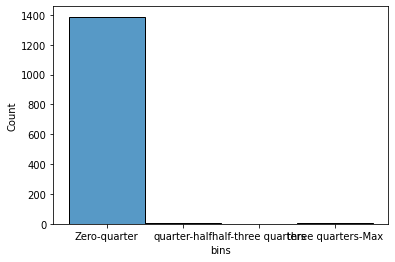

In [75]:
df['bins'] = pd.cut(df['weights'], bins = bins_list,labels=bins_labels)
sns.histplot(data=df['bins'])

# df = df.loc[df['weights']!=0]

df['bins'].cat.add_categories(['Zero'])
print(df['bins'])